## Cancer Classifier POC

## <span style="color:red">I Data import & cleaning</span>

In [2]:
import pyforest
#df.style.set_properties(subset=['comment'], **{'width': '600px'})
#lazy_imports()

In [1]:
df = pd.read_excel("AmarNLP.xlsx", header=2, usecols=['MRN', 'birthD', 'final', 'dxcomment', 'interpretation'], parse_dates=['birthD'])

<IPython.core.display.Javascript object>

In [21]:
df.head()

,MRN,birthD,final,dxcomment,interpretation
0,50533784,1967-05-24,"Esophagus, random biopsy -- 1. No diagnos...",NaN,Negative
1,90685445,1949-08-02,"Urine, Collection Method Not Specified: ...",NaN,Positive
2,32266190,1971-07-03,"Uterus, cervix, bilateral fallopian tubes, hys...",The slides from the leiomyomata were reviewed ...,Negative
3,50104349,1978-08-17,"Cerebrospinal Fluid, Tube 4: NEGATIVE FO...",NaN,Negative
4,94027610,1986-06-18,Specimen AdequacySatisfactory for evaluation. ...,NaN,Negative


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MRN             1848 non-null   int64         
 1   birthD          1848 non-null   datetime64[ns]
 2   final           1848 non-null   object        
 3   dxcomment       368 non-null    object        
 4   interpretation  1848 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 72.3+ KB


In [24]:
df['comment'] = np.where(~df['dxcomment'].isnull(), df['final']+' '+ df['dxcomment'], df['final'])

<IPython.core.display.Javascript object>

In [25]:
df.drop(columns=['final', 'dxcomment'], inplace=True)

In [26]:
df.drop_duplicates(keep='first',inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 1847
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MRN             1848 non-null   int64         
 1   birthD          1848 non-null   datetime64[ns]
 2   interpretation  1848 non-null   object        
 3   comment         1848 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 72.2+ KB


In [31]:
result_map = {'Negative': 1, 
            'Positive': 2,
            'Intermediate': 3} 
df['result']=df['interpretation'].map(result_map)

In [39]:
df.info()

312

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

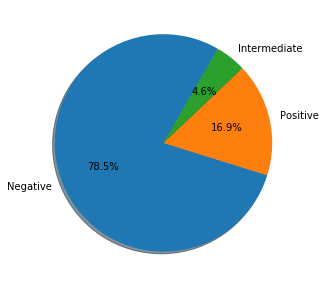

In [49]:
fig = plt.figure(figsize=(5, 5))
labels = 'Negative', 'Positive', 'Intermediate'
sizes = [len(df[df['result']==1]), len(df[df['result']==2]), len(df[df['result']==3])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
plt.show()

In [3]:
df.interpretation.value_counts()

Negative        1451
Positive         312
Intermediate      85
Name: interpretation, dtype: int64